In [1]:
import pandas as pd
import numpy as np

# ploting graphs 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly._subplots import make_subplots
from wordcloud import WordCloud

# outliers
from scipy.stats import zscore

# normalisation and  transform non-num labels  to num for LabelEncoder.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, RobustScaler, StandardScaler

# spliting the data 
from sklearn.model_selection import train_test_split, GridSearchCV

# linear regression
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Logistic regression 
from sklearn. linear_model import LogisticRegression
# mesure the performance of classification 
from sklearn import metrics
# Classification models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# evaluating the prediction 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Unsup
# Agglomerative 
from sklearn.cluster import AgglomerativeClustering
# Dendogram
import scipy.cluster.hierarchy as shc
# K_Means 
from sklearn .cluster import KMeans
# Yellowbrick 
from yellowbrick.cluster import KElbowVisualizer

# streamlit
import streamlit as st
# pandas profiling 
from ydata_profiling import ProfileReport 

# Artificial network 
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Deep learning 
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Chatbot 
# from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from sklearn.metrics.pairwise import cosine_similarity

# saving the model 
import joblib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1-Visualize the distribution of tracks across different decades using a count plot: sns.countplot(data['decade']).

2-Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) over decades using a line plot: px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades').

3-Plot the trend of loudness over decades using a line plot: px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades').

4-Identify the top 10 genres based on popularity and plot the trends of various sound features (valence, energy, danceability, acousticness) for these genres using a grouped bar chart: px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres').

5-Generate a word cloud of the genres present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

6-Plot the word cloud of the genres: plt.imshow(wordcloud).

7-Generate a word cloud of the artists present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words).

8-Plot the word cloud of the artists: plt.imshow(wordcloud).

9-Identify the top 10 artists with the most songs produced and display the count and artist name: top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False).

10-Identify the top 10 artists with the highest popularity score and display the popularity score and artist name: top10_popular_artists[['popularity','artists']].sort_values('popularity', ascending=False).

11-Make a conclusion about our Data

In [2]:
df= pd.read_csv('data.csv')
df['decade'] = df['year'].apply(lambda x: (x // 10) * 10) 
df_d=df.copy()

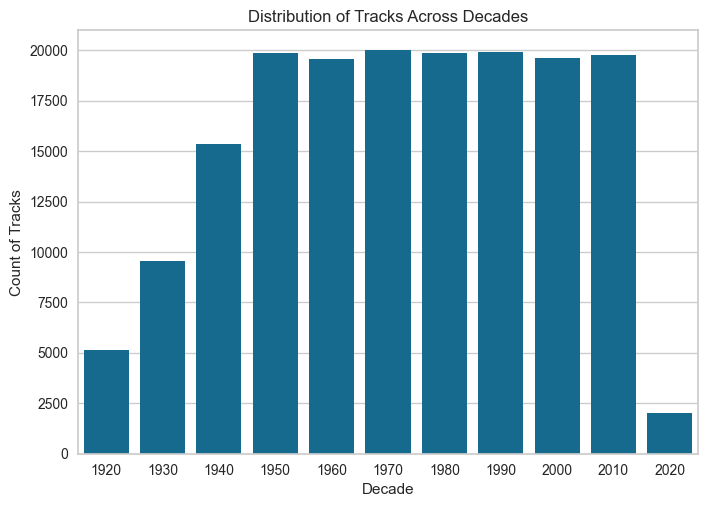

In [ ]:
# 1.Visualize the distribution of tracks across different decades using a count plot:
sns.countplot(df_d, x='decade')
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count of Tracks')
plt.show()

# Comment : 

# the plot represent the distribution of tracks across decades. 
# the distribution has increase in the first 3 decades of the evaluation (1920-1930-1940 ), 
# then over 70 years(from 1950 to 2010) the amount of tracks was stable overall (≃ 20 000 tracks/decade),
# a significant decrease was observed in the 2020 decade.

In [17]:
# 2.Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) 
# over decades using a line plot:

df_year= pd.read_csv('data_by_year.csv')
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

# Color map for each sound feature
color_map = {
    'acousticness': 'blue',
    'danceability': 'green',
    'energy': 'red',
    'instrumentalness': 'purple',
    'liveness': 'orange',
    'valence': 'yellow'
}


df_long = df_year.melt(id_vars=['year'], value_vars=sound_features, 
                       var_name='feature', value_name='value')

fig = px.line(df_long, x='year', y='value', color='feature',
              title='Trend of Various Sound Features Over Decades',
              labels={'value': 'Feature Value', 'year': 'Year', 'feature': 'Sound Feature'},
              color_discrete_map=color_map)

fig.show()

# Comment : 
# the sound features over decades have known a various changes: 
# the acousticness ans instrumentalness had decrease significantly
# the energy has increase gradually increase 
# danceability, valence and liveness was stable  

In [ ]:
# 3.Plot the trend of loudness over decades using a line plot:
df_year= pd.read_csv('data_by_year.csv')
fig = px.line(df_year, x='year', y='loudness', title='Trend of Loudness Over Decades')
fig.show()

# Comment:
# the trend of loudness over decades has gradualy increase until reaching the highest point in the last decace ( ≃6 )

In [15]:
# 4. Identify the top 10 genres based on popularity 
# and plot the trends of various sound features for these genres using a grouped bar chart:

df_gen= pd.read_csv('data_by_genres.csv')


top10_genres = df_gen.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)
top10_genres_data = df_gen[df_gen['genres'].isin(top10_genres.index)]
top10_genres_long = top10_genres_data.melt(id_vars=['genres'], value_vars=['valence', 'energy', 'danceability', 'acousticness'],
                                           var_name='feature', value_name='value')
fig = px.bar(top10_genres_long, x='genres', y='value', color='feature', 
             barmode='group', title='Trend of Various Sound Features Over Top 10 Genres',
             labels={'value': 'Feature Value', 'genres': 'Genres', 'feature': 'Sound Features'},
             color_discrete_map={
                 'valence': 'blue',
                 'energy': 'red',
                 'danceability': 'green',
                 'acousticness': 'purple'
             })
fig.show()


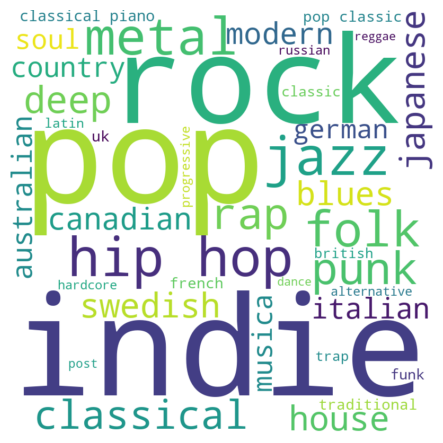

In [8]:
# 5. Generate a word cloud of the genres present in the dataset using the WordCloud library:
stopwords = set(["the", "of", "and", "in", "to", "a", "for", "with"])
comment_words = ' '.join(df_gen['genres'])

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, 
                      max_words=40, min_font_size=10).generate(comment_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

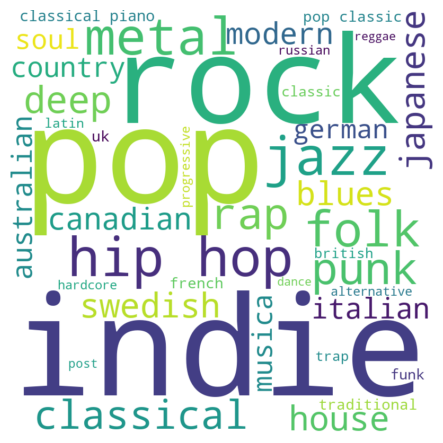

In [9]:
# 6.Plot the word cloud of the genres:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

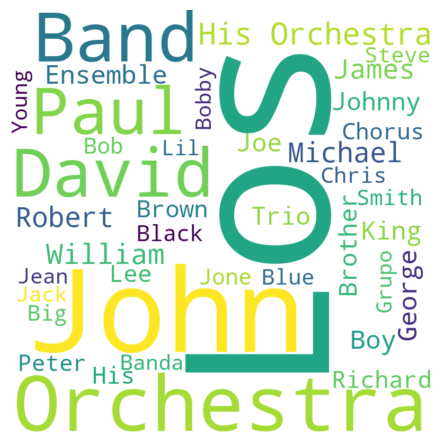

In [10]:
# 7. Generate a word cloud of the artists present in the dataset using the WordCloud library:
df_art= pd.read_csv('data_by_artist.csv')
comment_words = ' '.join(df_art['artists'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, 
                      min_word_length=3, max_words=40, min_font_size=10).generate(comment_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

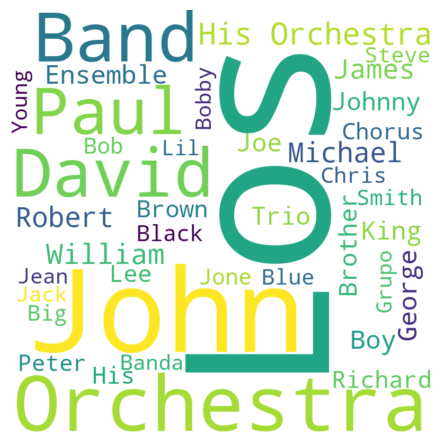

In [11]:
# 8. Plot the word cloud of the artists:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
# 9. Identify the top 10 artists with the most songs produced and display the count and artist name:
top10_most_song_produced_artists = df_art['artists'].value_counts().head(10)
top10_most_song_produced_artists


artists
조정현                                                                  1
"Cats" 1981 Original London Cast                                     1
"Cats" 1983 Broadway Cast                                            1
"Fiddler On The Roof” Motion Picture Chorus                          1
"Fiddler On The Roof” Motion Picture Orchestra                       1
"Joseph And The Amazing Technicolor Dreamcoat" 1991 London Cast      1
"Joseph And The Amazing Technicolor Dreamcoat" 1992 Canadian Cast    1
"Mama" Helen Teagarden                                               1
金智娟                                                                  1
鄭怡                                                                   1
Name: count, dtype: int64

In [13]:
# 10. Identify the top 10 artists with the highest popularity score and display the popularity score and artist name:
top10_popular_artists = df_art.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
top10_popular_artists


artists
Ritt Momney        93.0
Lele Pons          92.0
Los Legendarios    90.0
Jerry Di           89.0
Emilee             88.0
salem ilese        88.0
Surf Mesa          88.0
A7S                87.0
Lenny Santos       86.0
Master KG          86.0
Name: popularity, dtype: float64